# Model_2_convolutional_neural_network

In [ ]:
# this is keypopints from the postestimation model taken from 1 image each exercise
# 1st and 2nd entry represent point 1 x and y
lunge = [44, 216, 112, 220, 144, 164, 140, 160, 216, 152, 204, 220, 140, 160, 152, 84, 156, 68, 168, 28, 148, 172, 144, 132, 148, 84, 152, 84, 144, 124, 144, 160]

plank = [36, 164, 84, 160, 124, 140, 124, 136, 84, 156, 40, 160, 124, 140, 180, 144, 184, 144, 212, 148, 200, 180, 176, 180, 180, 144, 176, 140, 172, 168, 196, 172]

squat = [140, 196, 124, 156, 164, 144, 164, 144, 124, 160, 140, 200, 164, 144, 132, 92, 132, 88, 120, 60, 120, 72, 124, 64, 132, 88, 132, 92, 108, 92, 116, 80]

#wall_sit = [92, 196, 116, 148, 168, 140, 176, 152, 116, 156, 96, 212, 172, 148, 184, 76, 188, 60, 176, 20, 172, 136, 192, 108, 192, 76, 172, 84, 180, 116, 44, 128]


In [ ]:
import numpy as np
import random

def modify_coordinates(original_array, num_samples=100):
    def modify_single(original_array):
        modified_array = [num + random.randint(-10, 10) for num in original_array]
        modified_array = [max(0, min(255, num)) for num in modified_array]  # Ensure values are between 0 and 255
        return modified_array

    modified_arrays = []
    for _ in range(num_samples):
        modified_arrays.append(modify_single(original_array))

    combined_array = np.array(modified_arrays)
    return combined_array



# Generate modified lunge arrays dataset
lunges_dataset = modify_coordinates(lunge)
plank_dataset = modify_coordinates(plank)
squat_dataset = modify_coordinates(squat)
#wall_sit_dataset = modify_coordinates(wall_sit)

print(lunges_dataset.shape)
print(plank_dataset.shape)
print(squat_dataset.shape)
#print(wall_sit_dataset.shape)

(100, 32)
(100, 32)
(100, 32)


In [ ]:
lunges_dataset.shape

(100, 32)

In [ ]:
lunges_dataset[1]

array([ 37, 206, 104, 229, 145, 164, 132, 162, 212, 147, 214, 214, 138,
       164, 153,  81, 153,  58, 172,  27, 158, 166, 146, 139, 141,  86,
       148,  81, 150, 126, 153, 170])

In [ ]:
import matplotlib.pyplot as plt

def plot_data_points(data):
    # Extract x and y coordinates from the data
    x_coords = data[::2]  # Every even index is x coordinate
    y_coords = data[1::2]  # Every odd index is y coordinate

    # Plot the points
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', label='Data Points')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Data Points Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
data_points = [
    53, 225, 112, 223, 140, 164, 142, 165, 217, 151, 210, 227, 150,
    163, 142,  94, 152,  76, 159,  25, 155, 178, 137, 142, 157,  80,
    156,  74, 154, 134, 152, 153
]

import matplotlib.pyplot as plt

def plot_data_points2(data_list):
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 255)  # Set x-axis limits from 0 to 255
    plt.ylim(0, 255)  # Set y-axis limits from 0 to 255
    for data in data_list:
        # Extract x and y coordinates from the data
        x_coords = data[::2]  # Every even index is x coordinate
        y_coords = data[1::2]  # Every odd index is y coordinate
        plt.scatter(x_coords, y_coords)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Data Points Plot')
    plt.legend()
    plt.grid(True)
    plt.show()




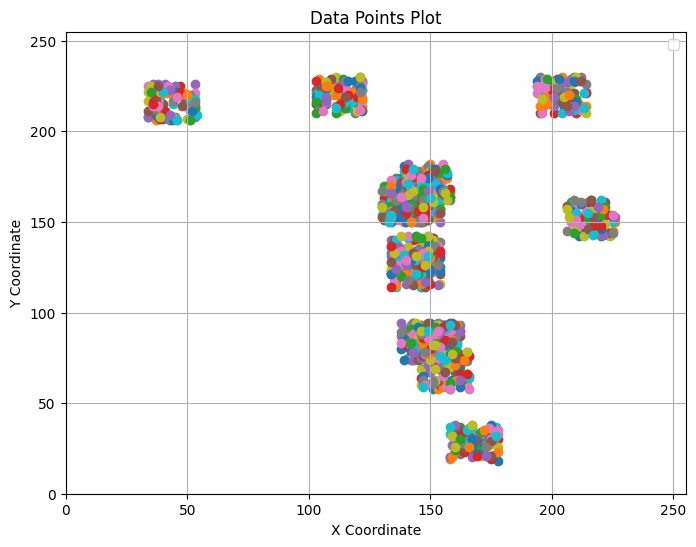

In [ ]:
plot_data_points2(lunges_dataset)

In [ ]:
print(lunges_dataset.shape)
print(plank_dataset.shape)
print(squat_dataset.shape)
#print(wall_sit_dataset.shape)

(100, 32)
(100, 32)
(100, 32)


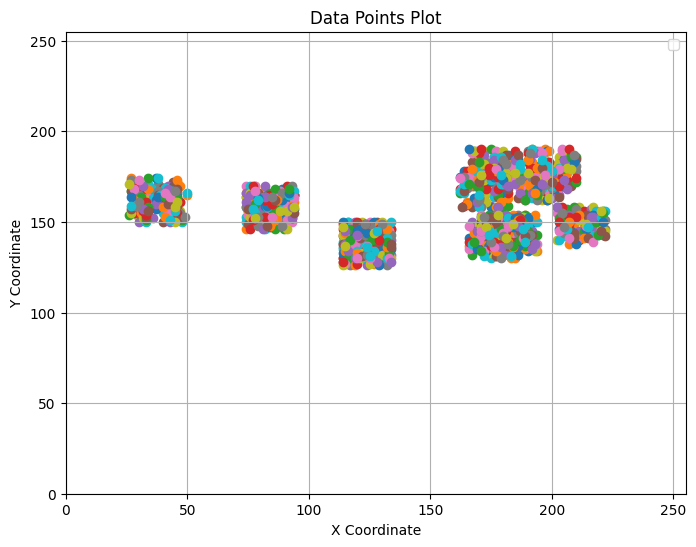

In [ ]:
plot_data_points2(plank_dataset)

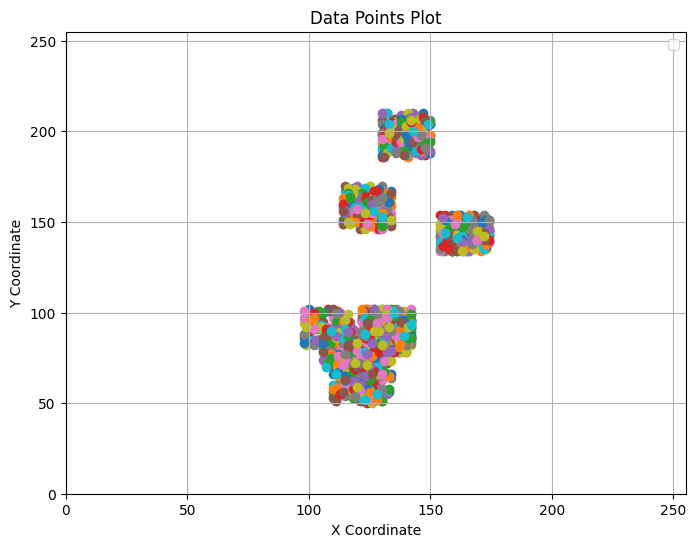

In [ ]:
plot_data_points2(squat_dataset)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded into variables data1, data2, data3, data4

data1 = lunges_dataset
data2 = plank_dataset
data3 = squat_dataset
#data4 = wall_sit_dataset

# Create labels based on classes (0, 1, 2, 3 for data1, data2, data3, data4 respectively)
labels1 = np.zeros((data1.shape[0],), dtype=int)     # Assuming data1 represents class 0
labels2 = np.ones((data2.shape[0],), dtype=int)      # Assuming data2 represents class 1
labels3 = np.full((data3.shape[0],), 2, dtype=int)   # Assuming data3 represents class 2
#labels4 = np.full((data4.shape[0],), 3, dtype=int)   # Assuming data4 represents class 3

# Concatenate the data along axis 0 to create one combined dataset
combined_data = np.concatenate((data1, data2, data3), axis=0)

# Concatenate the labels along axis 0 to create one combined labels array
combined_labels = np.concatenate((labels1, labels2, labels3), axis=0)

# Split the combined dataset and labels into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_data, combined_labels, test_size=0.2, random_state=42)

# Check the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (240, 32)
X_test shape: (60, 32)
y_train shape: (240,)
y_test shape: (60,)


In [ ]:
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout

# Normalize the input data (X) to [0, 1] range

X_train_norm = X_train

X_test_norm = X_test

#X_test_norm = np.reshape(X_test_norm, (-1, 1, 32))

# Convert integer labels to one-hot encoding
num_classes = 3  # Example: If you have 4 classes
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
#y_train_cat = y_train
#y_test_cat = y_test


# Define the model architecture
model = Sequential()
model.add(Dense(128, input_shape=(32,), activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(64, activation='relu'))  # Add another dense layer
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_norm, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test_norm, y_test_cat))#,callbacks=[early_stopping])



Epoch 1/50
8/8 [==============================] - 1s 24ms/step - loss: 35.7729 - accuracy: 0.3208 - val_loss: 5.8979 - val_accuracy: 0.3667
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 12.2488 - accuracy: 0.4167 - val_loss: 1.3831 - val_accuracy: 0.8500
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 6.4299 - accuracy: 0.5333 - val_loss: 1.7522 - val_accuracy: 0.7333
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 3.5829 - accuracy: 0.6667 - val_loss: 0.3686 - val_accuracy: 0.9833
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 2.5992 - accuracy: 0.7458 - val_loss: 0.2953 - val_accuracy: 0.9000
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 1.5489 - accuracy: 0.8083 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0121 - accuracy: 0.8458 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 8/50
8/8 [===============

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 14659 (57.26 KB)
Trainable params: 14659 (57.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 50.4 MB/s eta 0:00:00


In [ ]:
import tf2onnx
import onnx
import tensorflow as tf

In [ ]:
input_signature = [tf.TensorSpec([None, 32,], tf.int8, name='x')]
# Use from_function for tf functions
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13)
onnx.save(onnx_model, "post_estimation_classification.onnx")

Google Collab Link:

https://colab.research.google.com/drive/1qVHg8aXl_KnYiRy3E1LpazSU-Vf1zbFF?usp=sharing